In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
# load the input data
f = open('./house_sample.txt', 'r')
#f = open('../house_64.txt','r')
content = f.readlines()
f.close()

In [3]:
# data pre-processing: time-access
x1 = []
y1 = []

x2 = []
y2 = []

x3 = []
y3 = []

x4 = []
y4 = []

for line in content:
    #print(line)
    time_str = ''
    start = False
    for char in line:
        if char == ']':
            break
        if start:
            time_str += char
        if char == '[':
            start = True
            
    #print(time_str)
    #print(line)
    # manual add range
    #if int(time_str) < 789000 or int(time_str)>791000:
    #    continue
    
    
    
    if "I" in line:  # line anchor
        x1.append(int(time_str))
        y1.append(1) 
        #print("1", int(time_str))
    if "O" in line:  # level 1 logic, every pixel should do once
        x2.append(int(time_str))
        y2.append(0.99)
        #print("2", int(time_str))
    if "K" in line:  # level 2 logic
        x3.append(int(time_str))
        y3.append(0.98)
    if "R" in line:
        x4.append(int(time_str))
        y4.append(0.97)

In [4]:
# basic statistics
# statistics
I_count = 0   # row level
O_count = 0   # pixel level
K_count = 0   # second level logic
R_count = 0   # third level logic



for line in content:
    if "I" in line:
        I_count += 1
    if "O" in line:
        O_count += 1
    if "K" in line:
        K_count += 1
    if "R" in line:
        R_count += 1
print(I_count, O_count, K_count, R_count)


256 84920 48543 15000


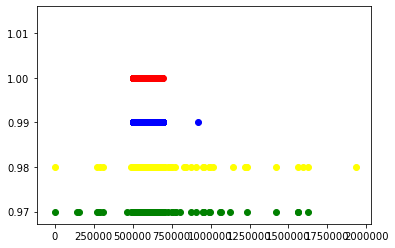

In [5]:
# check if the time pattern is there.
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")     
plt.scatter(x3, y3, color="yellow")    
plt.scatter(x4, y4, color="green")   
plt.show()

In [6]:
# try to handle it.
## get avg distance between red points.
avg_distance = 0
for i in range(1,len(x1)):
    avg_distance += x1[i] - x1[i-1]
avg_distance= avg_distance/len(x1)

print(avg_distance)

739.62890625


In [7]:
#preprocess x2, x3 and x4
processed_x2 = []
for i in range(1,len(x2)):
    if x2[i]-x2[i-1] < 2:
        pass
    else:
        processed_x2.append(x2[i-1])
        
processed_x3 = []
for i in range(1,len(x3)):
    if x3[i]-x3[i-1] < 3:
        pass
    else:
        processed_x3.append(x3[i-1])
        
processed_x4 = []
for i in range(1,len(x4)):
    if x4[i]-x4[i-1] < 3:
        pass
    else:
        processed_x4.append(x4[i-1])
        
print(len(processed_x2), len(processed_x3), len(processed_x4))

61123 12404 7699


In [11]:
# now check the number of x2 points between each x1
x2_count_in_line = []
num_of_point = 0
x1_counter = 0
for p in processed_x2:
    if p<x1[x1_counter]:
        num_of_point += 1
    else:
        x2_count_in_line.append(num_of_point)
        num_of_point = 1
        x1_counter += 1
    if x1_counter >= len(x1):
        break
        
print(x2_count_in_line, len(x2_count_in_line))

# use x2_count_in_line to remove non-sense points and regulate the pixel counter.



[0, 1, 1, 1, 1, 1, 1, 125, 1, 154, 1, 164, 346, 1, 350, 175, 1, 170, 178, 162, 178, 172, 181, 521, 1, 1, 180, 1, 1, 172, 178, 190, 194, 182, 253, 4, 266, 284, 272, 215, 206, 230, 1, 228, 217, 234, 245, 220, 240, 251, 462, 237, 206, 442, 223, 214, 214, 217, 229, 213, 246, 245, 262, 262, 276, 286, 282, 258, 250, 300, 280, 287, 259, 199, 1, 382, 428, 219, 216, 210, 219, 215, 216, 221, 1, 230, 1, 237, 240, 241, 2, 230, 235, 245, 238, 228, 234, 219, 217, 220, 219, 221, 239, 507, 262, 258, 258, 298, 536, 530, 280, 273, 271, 914, 286, 308, 593, 609, 296, 277, 831, 249, 233, 230, 222, 224, 224, 216, 235, 211, 216, 215, 1, 212, 281, 1, 1, 305, 294, 254, 241, 247, 228, 241, 232, 227, 248, 243, 254, 238, 249, 252, 234, 250, 265, 261, 268, 265, 269, 498, 258, 262, 304, 293, 300, 307, 3, 320, 603, 320, 294, 253, 253, 246, 232, 210, 211, 225, 191, 201, 195, 194, 215, 1, 420, 417, 408, 195, 189, 198, 214, 208, 211, 215, 199, 228, 222, 214, 231, 260, 246, 1, 294, 338, 316, 384, 1, 1, 398, 1, 345, 340,

In [12]:
x3_count_in_line = [0]*len(processed_x2)
x2_counter=0
x3_counter = 0
while True:
    p = processed_x3[x3_counter]
    #print(p, processed_x2[x2_counter])
    if p<=x2[x2_counter]:
        x3_count_in_line[x2_counter]+=1
        x3_counter += 1
    else:
        x2_counter += 1
    if x2_counter >= len(processed_x2) or x3_counter >= len(processed_x3):
        break
        
print(x3_count_in_line, len(x3_count_in_line))

[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 